<a href="https://colab.research.google.com/github/Satriyosakti/pemrogramanpython1/blob/main/tugas10satriyosw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
ls 

 06C881CB-EC9B-4723-9F97-272473D27914.jpeg
'1101180371 Registras,i | Telkom University.pdf'
 28AA2F97-449D-494B-A726-C56E29DAEE4E.jpeg
 3scene/
 63CED25F-D0A4-4A89-9783-8336E462D998.jpeg
 8EC1F935-9633-4DB4-804E-3EEF72959F05.jpeg
'BUKTI PENERIMAAN ROADSHOW KE SEKOLAH.pdf'
'CamScanner 08-24-2020 00.56.50_1.pdf'
 Classroom/
'Colab Notebooks'/
 D22F5403-6C65-4EEF-AE30-F486BA07C264.jpeg
 F6F41B8C-ABA0-4B28-B3DA-E26584A31508.jpeg
 iiii.pdf
'Jurnal_1_42_Satriyo Sakti W_1101180371_RABU 2.pdf'
'JURNAL_MODUL1_SISKOM-18059_1101180371_SatriyoSaktiW (1).docx'
 JURNAL_MODUL1_SISKOM-18059_1101180371_SatriyoSaktiW.docx
 JURNAL_MODUL2_SISKOM-18059_1101180371_SatriyoSaktiWicaksono.pdf
'JURNAL_MODUL3_SISKOM-18059_1101180371_Satriyo Sakti W.pdf'
 kartupeserta_270853207.pdf
'KUIS 2 _ SATRIYOSAKTI_1101180371..pdf'
'LH_GELADI2020_1_1101180371_SATRIYOSAKTIW(2).pdf'
 LH_GELADI2020_2_1101180371_SATRIYOSAKTIW.pdf
 LH_GELADI2020_3_1101180371_SATRIYOSAKTIW.pdf
 LH_GELADI2020_4_1101180371_SATRIYOSAKTIW.pdf
 LH_GEL

In [5]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [6]:
# grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [7]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [8]:
print(labels)

['highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway'

In [11]:
# encode the labels, converting them from strings to integers 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [12]:
# perform a troining and testing split, using 75% of the data for 
# training and 25% for evaluation

(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [13]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential (
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [15]:
# train the model using the Adam optimizer
print ("[INFO] training network...") 
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, 
  metrics=["accuracy"])

H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 1s 31ms/step - loss: 1.2531 - accuracy: 0.3309 - val_loss: 1.2593 - val_accuracy: 0.3797
Epoch 2/25
23/23 [==============================] - 0s 13ms/step - loss: 1.0005 - accuracy: 0.5293 - val_loss: 1.0953 - val_accuracy: 0.5527
Epoch 3/25
23/23 [==============================] - 0s 13ms/step - loss: 0.9438 - accuracy: 0.5755 - val_loss: 0.8948 - val_accuracy: 0.5738
Epoch 4/25
23/23 [==============================] - 0s 14ms/step - loss: 0.7710 - accuracy: 0.6586 - val_loss: 0.8384 - val_accuracy: 0.6371
Epoch 5/25
23/23 [==============================] - 0s 13ms/step - loss: 0.7021 - accuracy: 0.7062 - val_loss: 0.8173 - val_accuracy: 0.6456
Epoch 6/25
23/23 [==============================] - 0s 13ms/step - loss: 0.6692 - accuracy: 0.7136 - val_loss: 0.7487 - val_accuracy: 0.6835
Epoch 7/25
23/23 [==============================] - 0s 15ms/step - loss: 0.7364 - accuracy: 0.6775 - val_loss: 0.8055 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


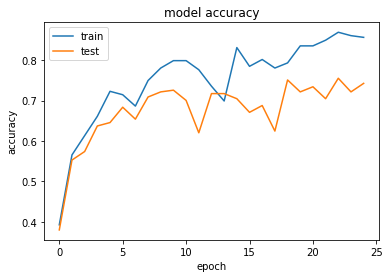

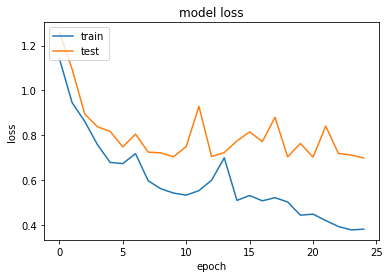

In [30]:
import matplotlib.pyplot as plt

print(H.history.keys()) 
# summarize history for accuracy
plt.plot(H.history['accuracy']) 
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(H.history['loss']) 
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [31]:
# evaluate the network
print("[INFO] evaluating network...") 
predictions = model.predict(testX, batch_size=32) 
print(classification_report(testY.argmax (axis=1),
  predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...


TypeError: ignored

In [32]:
model.save('model_scene')

INFO:tensorflow:Assets written to: model_scene/assets


In [35]:
import cv2
import matplotlib.pyplot as plt
image1='63CED25F-D0A4-4A89-9783-8336E462D998.jpeg'

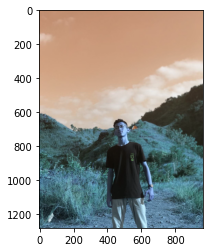

In [36]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [37]:
image_testing = Image.open ('63CED25F-D0A4-4A89-9783-8336E462D998.jpeg')
image_testing = np.array(image_testing.resize((64,64))) / 255.0
image_testing.shape

(64, 64, 3)

In [38]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)
